In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import re

In [ ]:
company_list=['Exxon Mobil','British petroleum BP','PetroChina','Schlumberger','Chevron Corporation','Johnson & Johnson Company','Pfizer','Unitedhealth Group UNH','Merck and co pharmaceutical company','Abbott Laboratories','Ford Motor','General Motors','Honda Motor','Toyota Motor Corp','Tesla Inc','JPMorgan Chase','CitiBank Citi Group','UBS Group','HSBC','Barclays','Microsoft','Sony Corp','Amazon','Netflix','Tencent']
for c in company_list:
    file_name='data/{0}/{1}_news_{2}.xlsx'.format(company,company,from_date)

In [12]:
def text_searcher(text,keys):
    result=""
    sents=str(text).split(". ")
    for key in keys:
        for sent in sents:
            if key.lower() in sent.lower():
                #print(sent," key: ",key)
                result=result+"***"+str(sent)
    return result

In [3]:
#jpmc='data\JPMorgan Chase\JPMorgan Chase_news_{0}.xlsx'.format(DATE)
#abbott='data\Abbott Laboratories\Abbott Laboratories_news_{}.xlsx'.format(DATE)
#amzn='data\Amazon\Amazon_news_{0}.xlsx'.format(DATE)
#barclays='data\Barclays\Barclays_news_{0}.xlsx'.format(DATE)
#google='data\Google\Google_news_{0}.xlsx'.format(DATE)
#hsbc='data\HSBC\HSBC_news_{0}.xlsx'.format(DATE)
#jnj='data/Johnson & Johnson Company/Johnson & Johnson Company/Johnson & Johnson Company_news_{0}.xlsx'.format(DATE)
#bp="data\British petroleum BP\British petroleum BP_news_{0}.xlsx".format(DATE)
#city="data\CitiBank Citi Group\CitiBank Citi Group_news_{0}.xlsx".format(DATE)
#exxon="data\Exxon Mobil\Exxon Mobil_news_{0}.xlsx".format(DATE)
#ford="data\Ford Motor\Ford Motor_news_{0}.xlsx".format(DATE)
#gm="data\General Motors\General Motors_news_{0}.xlsx"
#honda="data\Honda Motor\Honda Motor_news_{0}.xlsx".format(DATE)
#merck="data\Merck and co pharmaceutical company\Merck and co pharmaceutical company_news_{0}.xlsx".format(DATE)
#msft='data\Microsoft\Microsoft_news_{0}.xlsx'.format(DATE)
#ntflx="data\Netflix\Netflix_news_{0}.xlsx".format(DATE)
#petrochina="data\PetroChina\PetroChina_news_{0}.xlsx".format(DATE)
#pfizer="data\Pfizer\Pfizer_news_{0}.xlsx".format(DATE)
#schlum="data\Schlumberger\Schlumberger_news_{0}.xlsx".format(DATE)
#sony='data\Sony Corp\Sony Corp_news_{0}.xlsx'.format(DATE)
#tencent='data\Tencent\Tencent_news_{0}.xlsx'.format(DATE)
#tesla='data\Tesla Inc\Tesla Inc_news_{0}.xlsx'.format(DATE)
#toyota='data\Toyota Motor Corp\Toyota Motor Corp_news_{0}.xlsx'.format(DATE)
#ubs='data\UBS Group\UBS Group_news_{0}.xlsx'.format(DATE)
#unh='data\Unitedhealth Group UNH\Unitedhealth Group UNH_news_{0}.xlsx'.format(DATE)

In [ ]:
#abbott='data\trainingFolder\Abbott Laboratories_news_{}.xlsx'.format(DATE)
#amzn='data\trainingFolder\Amazon_news_{0}.xlsx'.format(DATE)
#barclays='data\trainingFolder\Barclays_news_{0}.xlsx'.format(DATE)
#hsbc='data\trainingFolder\HSBC_news_{0}.xlsx'.format(DATE)
#jnj='data/trainingFolder/Johnson & Johnson Company_news_{0}.xlsx'.format(DATE)
#bp="data\trainingFolder\British petroleum BP_news_{0}.xlsx".format(DATE)
#city="data\trainingFolder\CitiBank Citi Group_news_{0}.xlsx".format(DATE)
#exxon="data\trainingFolder\Exxon Mobil_news_{0}.xlsx".format(DATE)
#ford="data\trainingFolder\Ford Motor_news_{0}.xlsx".format(DATE)
#gm="data\trainingFolder\General Motors_news_{0}.xlsx"
#honda="data\trainingFolder\Honda Motor_news_{0}.xlsx".format(DATE)
#merck="data\trainingFolder\Merck and co pharmaceutical company_news_{0}.xlsx".format(DATE)
#msft='data\trainingFolder\Microsoft_news_{0}.xlsx'.format(DATE)
#ntflx="data\trainingFolder\Netflix_news_{0}.xlsx".format(DATE)
#petrochina="data\trainingFolder\PetroChina_news_{0}.xlsx".format(DATE)
#pfizer="data\trainingFolder\Pfizer_news_{0}.xlsx".format(DATE)
#schlum="data\trainingFolder\Schlumberger_news_{0}.xlsx".format(DATE)
sony='data\trainingFolder\Sony Corp_news_{0}.xlsx'.format(DATE)
tencent='data\trainingFolder\Tencent_news_{0}.xlsx'.format(DATE)
tesla='data\trainingFolder\Tesla Inc_news_{0}.xlsx'.format(DATE)
toyota='data\trainingFolder\Toyota Motor Corp_news_{0}.xlsx'.format(DATE)
ubs='data\trainingFolder\UBS Group_news_{0}.xlsx'.format(DATE)
unh='data\trainingFolder\Unitedhealth Group UNH_news_{0}.xlsx'.format(DATE)
jpmc='data\trainingFolder\JPMorgan Chase_news_{0}.xlsx'.format(DATE)

In [13]:
def remove_specials(text):
    punct = ""
    res=""
    Punct = ["","â",":","“","’",'"','#','$','%','&','(',')','*','+','-','/',':',';','<','>','=','@','[',']','^','_','{','}','|','~','™','€','â']
    for p in Punct:
        punct = punct + (str(p))
    try:
        for word in text.split(" "):
            word1=word.strip(punct)
            res=res+" "+word1
    except:
        res=res
    return(res)

In [147]:
dates=[]
articles=[]
ccc=0
kg=["05"]
for kayjee in kg:
    for i in range(12,31):
        k=1+i
        if(k<10):
            DATE="2020-"+kayjee+"-0"+str(k).format(kg)
        else:
            DATE="2020-"+kayjee+"-"+str(k).format(kg)
        #print(DATE)
        filename=r"data\trainingFolder\Schlumberger_news_{0}.xlsx".format(DATE)
        #print(filename)
        try:
            d=pd.read_excel(filename)
            ccc=ccc+len(d)
            #print("opened file for:", DATE)
        except:
            #print("Can't open for: ",DATE)
            continue
        words=["Sch","PFE"]
        article=""
        #print("in the loop")
        for i in range(len(d)):
            headlines=d['Headline'][i]
            description=d['Description'][i]
            fullnews=d['FullNews'][i]
            k=text_searcher(remove_specials(headlines),words)
            if(len(k)>2):
                article=article+" "+k
            k=text_searcher(remove_specials(description),words)
            if(len(k)>2):
                article=article+" "+k
            k=text_searcher(remove_specials(fullnews),words)
            if(len(k)>2):
                article=article+" "+k
        if(len(article)>10):
            dates.append(DATE)
            articles.append(article)
        #print("**************************************")

In [148]:
print(ccc)
print(len(articles))
for a in articles:
    print(a)
    print("")

151
7
 *** Can Pfizer's Stock Keep Climbing? *** The big news regarding Pfizer(NYSE:PFE these days centers on its search for a COVID-19 vaccine, but that just obscures more important news for investors*** The big news regarding Pfizer(NYSE:PFE these days centers on its search for a COVID-19 vaccine, but that just obscures more important news for investors *** 'Like a war' Pfizer head of vaccines talks finding a treatment for coronavirus *** Kathrin Jansen and her team at Pfizer are on an accelerated path to find and produce a coronavirus vaccine by the end of 2020. *** Pharmaceutical giant Pfizer announced last week that it had begun testing multiple versions of an experimental coronavirus vaccine in healthy adults in the U.S., greatly accelerating the vaccine deve… 5916 chars *** Pfizer COVID-19 Vaccine Could Arrive in October  WebMD *** Pfizer COVID-19 Vaccine Could Arrive in OctoberWebMD Coronavirus vaccine Macaque monkey trial offers hopeBBC News BAT says potential COVID-19 vaccine

In [137]:
def Stock_searcher(D1):
    global stocks
    for i in range(len(stocks)):
        D2=stocks['Date'][i]
        if(D1==D2):
            return([stocks['intraday'][i],stocks['interday'][i],stocks['highlow'][i],stocks['upintraday'][i],stocks['downintraday'][i],stocks['upinterday'][i],stocks['downinterday'][i],D2])
    return([])

In [149]:
stocks=pd.read_excel(r'data\trainingFolder\master\stockprices\PFE.xlsx')

In [150]:
date=[]
newsA=[]
interday=[]
intraday=[]
highlow=[]
upintraday=[]
downintraday=[]
upinterday=[]
downinterday=[]
for i in range(len(articles)):
    D1=datetime.strptime(dates[i],"%Y-%m-%d")
    r=Stock_searcher(D1)
    a=str(articles[i])
    if(len(r)!=0):
        intraday.append(r[0])
        interday.append(r[1])
        highlow.append(r[2])
        upintraday.append(r[3])
        downintraday.append(r[4])
        upinterday.append(r[5])
        downinterday.append(r[6])
        date.append(r[7])
        newsA.append(a)
lobhai=pd.DataFrame()
lobhai['date']=date
lobhai['article']=newsA
lobhai['interday']=interday
lobhai['intraday']=intraday
lobhai['highlow']=highlow
lobhai['upintraday']=upintraday
lobhai['downintraday']=downintraday
lobhai['upinterday']=upinterday
lobhai['downinterday']=downinterday

In [151]:
lobhai

,date,article,interday,intraday,highlow,upintraday,downintraday,upinterday,downinterday
0,2020-05-18,*** Sarepta Surges on Rival Pfizer's DMD Gene...,-0.580002,-0.270000,0.829998,0,1,0,1
1,2020-05-19,"*** Covid vaccine Pfizer, BNTECH start dosing...",0.220002,-0.169998,0.709999,0,1,1,0
2,2020-05-20,***Pfizer *** GlaxoSmithKline(NYSE:GSK and Pf...,-0.270001,-0.320000,0.650002,0,1,0,1
3,2020-05-21,*** Why Pfizer Looks Undervalued At 38 *** Pf...,0.060001,-0.310002,0.600003,0,1,1,0
4,2020-05-22,*** Pfizer Inc *** NEW YORK--(BUSINESS WIRE)-...,0.149997,0.389999,0.570000,1,0,1,0


In [152]:
from monkeylearn import MonkeyLearn
ml = MonkeyLearn('0f548cf4a2cab18cab1fd3ddf9d28a8f25db5f9f')
model_id = 'cl_pi3C7JiL'

result = ml.classifiers.classify(model_id, newsA)

rev=[]
sent=[]
conf=[]
score=[]
for x in result.body:
    rev.append(str(x.get('text')))
    sent.append(str(x.get('classifications')[0].get('tag_name')))
    conf.append(float(x.get('classifications')[0].get('confidence')))
    if(str(x.get('classifications')[0].get('tag_name'))=="Negative"):
        score.append(float(-1*x.get('classifications')[0].get('confidence')))
    elif(str(x.get('classifications')[0].get('tag_name'))=="Positive"):
        score.append(float(1*x.get('classifications')[0].get('confidence')))
    else:
        score.append(float(0.0))
lobhai['sentiment']=sent
lobhai['confidence']=conf
lobhai['score']=score

In [154]:
lobhai.to_excel('data/trainingFolder/master/trainsets/PFE.xlsx')

In [153]:
lobhai

,date,article,interday,intraday,highlow,upintraday,downintraday,upinterday,downinterday,sentiment,confidence,score
0,2020-05-18,*** Sarepta Surges on Rival Pfizer's DMD Gene...,-0.580002,-0.270000,0.829998,0,1,0,1,Neutral,0.445,0.000
1,2020-05-19,"*** Covid vaccine Pfizer, BNTECH start dosing...",0.220002,-0.169998,0.709999,0,1,1,0,Positive,0.875,0.875
2,2020-05-20,***Pfizer *** GlaxoSmithKline(NYSE:GSK and Pf...,-0.270001,-0.320000,0.650002,0,1,0,1,Negative,0.572,-0.572
3,2020-05-21,*** Why Pfizer Looks Undervalued At 38 *** Pf...,0.060001,-0.310002,0.600003,0,1,1,0,Negative,0.693,-0.693
4,2020-05-22,*** Pfizer Inc *** NEW YORK--(BUSINESS WIRE)-...,0.149997,0.389999,0.570000,1,0,1,0,Negative,0.782,-0.782


In [46]:
lobhai

,date,article,interday,intraday,highlow,upintraday,downintraday,upinterday,downinterday,sentiment,confidence,score
0,2020-05-19,*** The TV chef has registered charges with B...,0.08,-0.08,0.14,0,1,1,0,Neutral,0.574,0.000
1,2020-05-20,*** Mumbai Anil Agarwal-controlled Vedanta Re...,-0.10,0.06,0.10,1,0,0,1,Neutral,0.553,0.000
2,2020-05-21,*** We can 'absolutely' characterize this as ...,0.10,-0.01,0.13,0,1,1,0,Positive,0.484,0.484
3,2020-05-22,*** Barclays American Airlines Cards Earn 3x ...,-0.05,-0.08,0.14,0,1,0,1,Negative,0.995,-0.995


In [343]:
Y=[]
uD=[]
for i in range(len(lobhai)):
    s=lobhai['sentiment'][i]
    upintra=lobhai['upinterday'][i]
    downintra=lobhai['downinterday'][i]
    if(s=="Positive"):
        Y.append(1)
    elif(s=="Negative"):
        Y.append(-1)
    else:
        Y.append(0)
    if(upintra==1 and downintra==0):
        uD.append(1)
    elif(upintra==0 and downintra==1):
        uD.append(-1)
    else:
        uD.append(0)

In [234]:
import matplotlib.pyplot as plt

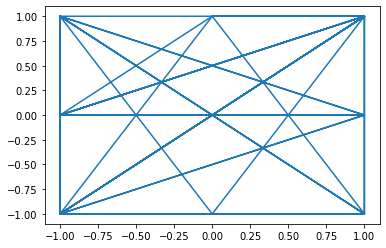

In [119]:
plt.plot(uD,Y)
#plt.plot(lobhai['date'],Y)

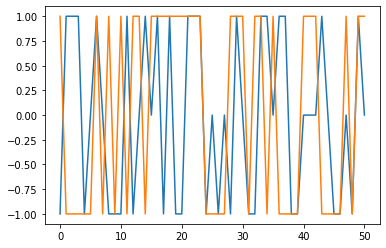

In [344]:
plt.plot(Y)
plt.plot(uD)

In [331]:
lobhai.head(10)

,date,article,interday,intraday,highlow,upintraday,downintraday,upinterday,downinterday,sentiment,confidence,score
0,2020-02-03,*** Honda sees weak month in U.S. *** ul><li>...,-0.260001,0.029998,0.250000,1,0,0,1,Negative,0.675,-0.675
1,2020-02-04,*** 2020 Honda Dio BS6 Teased Ahead Of Launch...,-0.240000,-0.059999,0.170000,0,1,0,1,Negative,0.595,-0.595
2,2020-02-05,***Honda and Hyundai led the way with strong ...,-0.280000,-0.040001,0.150000,0,1,0,1,Positive,0.551,0.551
3,2020-02-06,*** Honda may keep Wuhan plants closed longer...,-0.390002,-0.150002,0.250000,0,1,0,1,Neutral,0.640,0.000
4,2020-02-07,"*** Jaguar isn’t in the best place, Nio isn’t...",0.179998,0.119999,0.780000,1,0,1,0,Positive,0.703,0.703
5,2020-02-10,***Honda said on Feb ***Based on the Baojun R...,-0.219999,0.010000,0.189999,1,0,0,1,Positive,0.892,0.892
6,2020-02-11,*** Honda to restart vehicle production in Ch...,-0.190001,0.010000,0.190001,1,0,0,1,Negative,0.747,-0.747
7,2020-02-12,*** Though it plays second fiddle to more pop...,-0.150000,0.090000,0.160000,1,0,0,1,Positive,0.711,0.711
8,2020-02-13,*** Europe’s 2020 Honda Jazz Packs 107 HP Hyb...,0.090000,0.010000,0.099998,1,0,1,0,Neutral,0.714,0.000
9,2020-02-14,*** All-New Honda Fit Goes On Sale In Japan W...,0.129999,-0.170000,0.250000,0,1,1,0,Neutral,0.794,0.000
